In [1]:
from helpers import parse_gpx, identify_features, calculate_abilities, plot_elevation_chart, plot_elevation_chart_with_features
import pandas as pd
import numpy as np

In [2]:
#file_path = 'data/TdF-stage-17-route.gpx'
#file_path = 'data/RvV2023.gpx'
file_path = 'data/cholet-pays-de-la-loire-2023.gpx'
#file_path = 'data/giro-next-gen-2024-stage-3.gpx'
#file_path = 'data/itzulia-2024-stage-6.gpx'
#file_path = 'data/scotland-2023-me-rr.gpx'
#file_path = 'data/tdf-2024-stage-6.gpx'
#file_path = 'data/tour-of-slovenia-2019-stage-4.gpx'
regularized_points, total_distance, points = parse_gpx(file_path, min_distance=500)
features = identify_features(regularized_points)
abilities = calculate_abilities(features, total_distance)


stage_data = {
    'points_raw' : points,
    'points' : regularized_points,
    'features' : features,
    'abilities' : abilities,
    'total_distance' : total_distance,
    'year': 2024,
    'stage': file_path,
}

In [3]:
raw_points = pd.DataFrame( stage_data['points_raw'])

In [4]:
raw_points

,lat,lon,elev,dist
0,51.16899,3.33589,12.0,44.933587
1,51.16867,3.33708,12.0,135.211210
2,51.16866,3.33826,14.0,218.440431
3,51.16857,3.34094,14.0,407.300390
4,51.16862,3.34163,14.0,455.734368
...,...,...,...,...
3331,50.83961,3.58642,11.0,271089.810768
3332,50.83995,3.58867,11.0,271252.263052
3333,50.84002,3.58916,11.0,271287.539454
3334,50.84013,3.58989,11.0,271340.237840


In [5]:
processed_points = pd.DataFrame(stage_data['points'])

In [6]:
processed_points

,lat,lon,elev,delta_dist,dist,gradient,max_gradient,min_gradient,feature_type
0,51.16857,3.34336,14.0,579.877205,579.877205,0.344901,3.574294,0.000000,
1,51.16735,3.35035,13.0,506.627054,1086.504258,-0.197384,0.000000,-2.063696,
2,51.16568,3.35743,13.0,529.469772,1615.974030,0.000000,1.392037,-3.577962,
3,51.16237,3.36373,13.0,585.041709,2201.015740,0.000000,0.000000,0.000000,
4,51.15915,3.36900,13.0,514.050268,2715.066008,0.000000,0.000000,0.000000,
...,...,...,...,...,...,...,...,...,...
477,50.83232,3.55924,18.0,504.339717,268980.103238,0.594837,1.819059,0.000000,
478,50.83421,3.56592,17.0,524.106308,269504.209546,-0.190801,0.000000,0.000000,
479,50.83704,3.57208,14.0,536.328680,270040.538226,-0.559358,0.000000,-3.061980,
480,50.83892,3.58194,10.0,725.398948,270765.937174,-0.551421,0.000000,-2.500676,


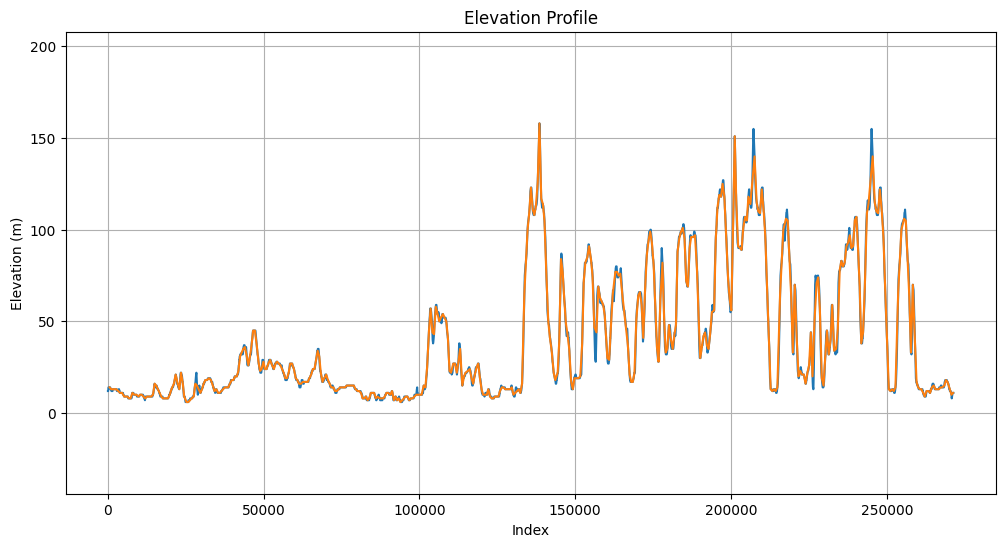

In [7]:
import matplotlib.pyplot as plt


# Plotting the profile
plt.figure(figsize=(12, 6))
plt.plot(raw_points['dist'], raw_points['elev'], label='Initial Data')
plt.plot(processed_points['dist'], processed_points['elev'], label='New Data')
plt.xlabel('Index')
plt.ylabel('Elevation (m)')
plt.title('Elevation Profile')
# Set the y-axis limits
plt.ylim(processed_points['elev'].min()-50, processed_points['elev'].max()+50)
plt.grid(True)

plt.show()

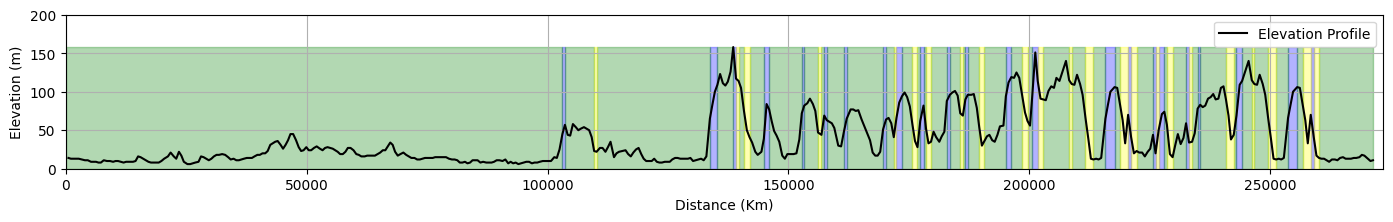

In [8]:
# Convert to DataFrame
stage_df = pd.DataFrame(stage_data['points'])
features_df = pd.DataFrame(stage_data['features'])

# Define color mapping for types
type_colors = {
    'hill': 'blue',
    'climb': 'red',
    'flat': 'green',
    'descent': 'yellow'
}

# Plot the profile chart
plt.figure(figsize=(17, 2))

# Plot elevation profile line
plt.plot(stage_df['dist'], stage_df['elev'], label='Elevation Profile', color='black')

# Plot filled area with colors based on 'type'
for t in type_colors:
    for index, row in features_df[features_df['type'] == t].iterrows():
        plt.fill_betweenx([0, max(stage_df['elev'])], row['start_km'], row['end_km'], color=type_colors[t], alpha=0.3)

# Set the y-axis limits
plt.xlim(0, 273400)
plt.ylim(0, 200)

# Labels and legend
plt.xlabel('Distance (Km)')
plt.ylabel('Elevation (m)')
plt.legend()
plt.grid(True)
plt.show()

<img src="https://64.media.tumblr.com/39df69f254145cb74f20d73d9cdfcb19/fa50a7c1c4325aeb-82/s2048x3072/e4694b333ca71ef6a369ca550812ec6cc6a1b6c2.jpg"></img>

In [9]:
stage_data['abilities']

{'Stamina': 6.94,
 'Sprint': 19.03,
 'Climbing': 0.0,
 'Flat': 17.69,
 'Technique': 2.49,
 'Downhill': 8.71,
 'Hills': 36.53,
 'Aggressiveness': 5.59,
 'Teamwork': 3.03}